## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [62]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [63]:
df[['TV','Radio']]

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

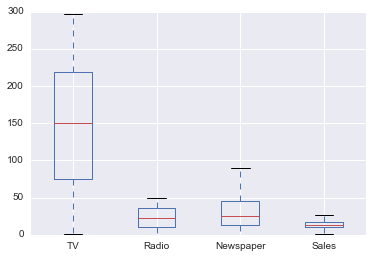

In [64]:
df.boxplot(return_type = 'axes')

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

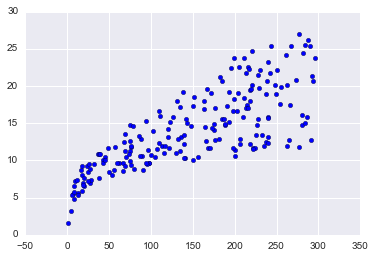

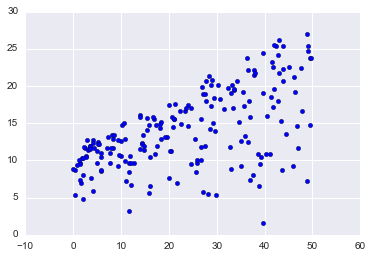

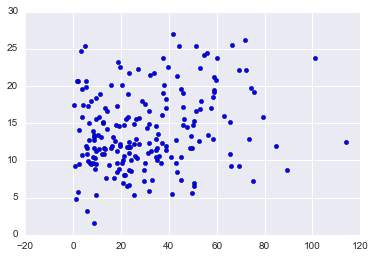

In [65]:
plt.scatter(df.TV, df.Sales)
plt.show()
plt.scatter(df.Radio, df.Sales)
plt.show()
plt.scatter(df.Newspaper, df.Sales)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6a5198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b384c18>]], dtype=object)

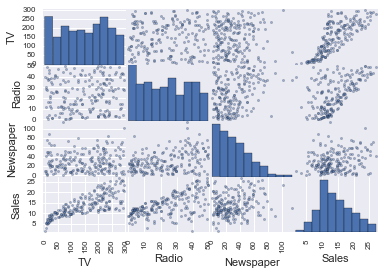

In [66]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer

ANS: TV and Radio seem corrleated with Sales, while Newspaper and Sales don't seem to be correlated 
that much

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [67]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [68]:
y = df.Sales.values

b) Set X to be just the features described above in df

In [69]:
X = []

for (a, b, c) in zip(df.TV.values, df.Radio.values, df.Newspaper.values):
    X.append([a, b, c])

c) Randomly split data into training and testing - 80% training, 20% testing.

In [70]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

d) Train model on training data, and make predictions on testing data

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [72]:
lr.score(X_train, y_train)

0.91116450801180016

R^2 is about 0.90 which is pretty good.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

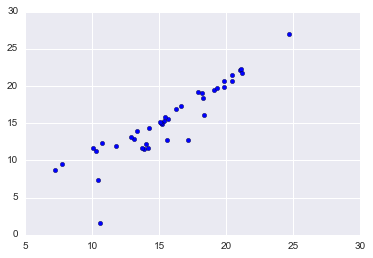

In [73]:
plt.scatter(lr.predict(X_test), y_test)

Looks pretty good.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [74]:
lr.coef_

array([ 0.04539872,  0.18751591, -0.00508388])

Based on the coefficient, radio seems to be most correlated with sales.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

It's hard to identify which feature has strong correlationg with sales as the numbers are all relatively small. Moreover, the coefficients indicate that radio has a stronger correlation with sales than tv, which seems to be not true based on the matrix scatter plot. Data normalization should have been performed to make each feature have equal weights. The code is show below.

In [75]:
from sklearn import preprocessing

y = df.Sales.values
X = []

for (a, b, c) in zip(df.TV.values, df.Radio.values, df.Newspaper.values):
    X.append([a, b, c])
    
normalized_X = preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.20)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.coef_

array([ 19.12451209,   7.92284625,   1.37906362])

Now we see that TV has the strongest correlation with sales, which is true.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

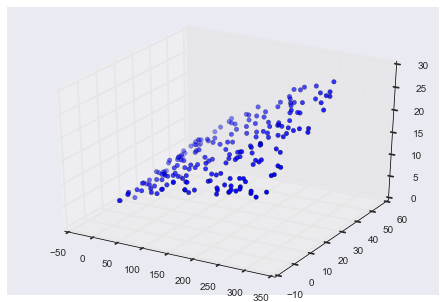

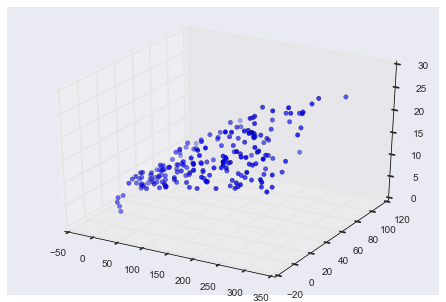

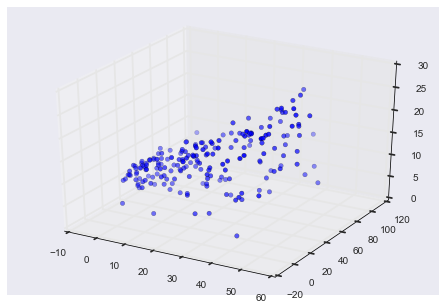

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.TV, df.Radio, df.Sales)
plt.show()
fig.clf()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.TV, df.Newspaper, df.Sales)
plt.show()
fig.clf()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.Radio, df.Newspaper, df.Sales)
plt.show()


Clearly, we first had to normalize our data. Moreover, from those 3d plots, it is clear that the scatter plot of TV and Radio vs Sales clearly shows a more plane like shape (hyerplane) than any other plots. Thus, even though a nomalized linear regression would have tryied to minize the weight for Newspaper while maximizing the weights for TV and Radio, we could have completely removed Newspaper when we were considering the features for our model for a better prediction.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


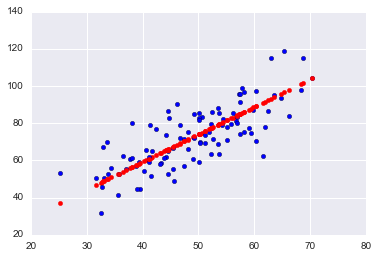

In [77]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


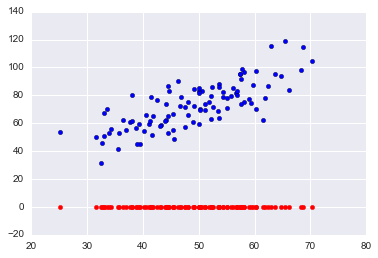

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


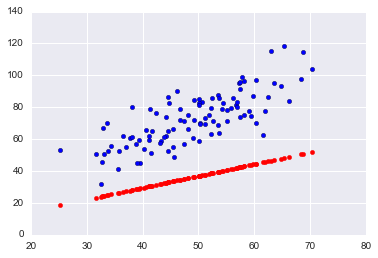

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


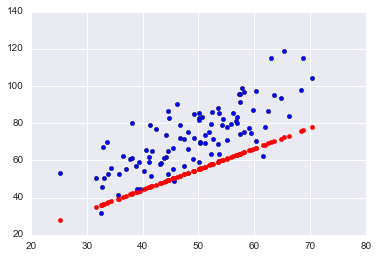

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


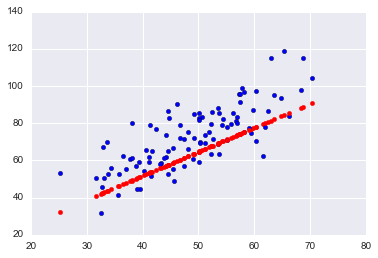

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


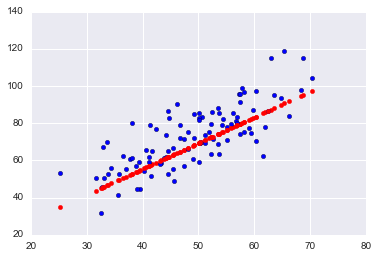

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


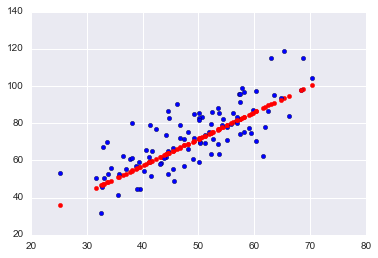

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


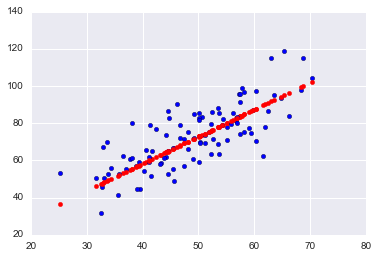

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


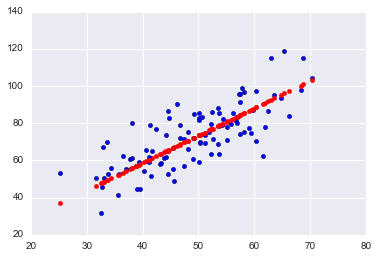

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


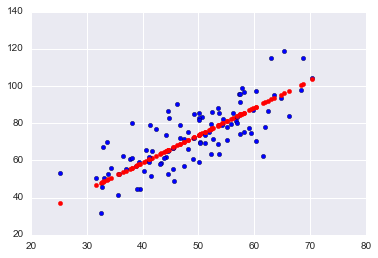

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


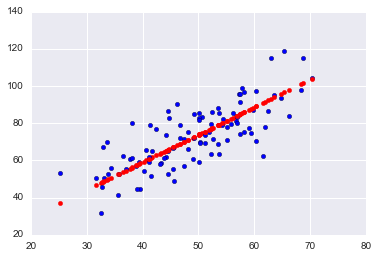

In [78]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


When performing gradient descent, if the learning rate is too big, it is possible that the gradient descent does not converge as each step is too big thus rather than converging to a local minimum of a convex function, gradient descent "overshoots" and diverges. If the learning rate is too small, each step is too small and will probably take a long time to converge.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

alpha: 5e-05
[5565.1078344832113, 3186.2669183340686, 1845.2854193756275, 1089.3578680541548, 663.23232650018758, 423.02017991777734, 287.60967009381125, 211.27711465249791, 168.24751899306284, 143.99120588588545]


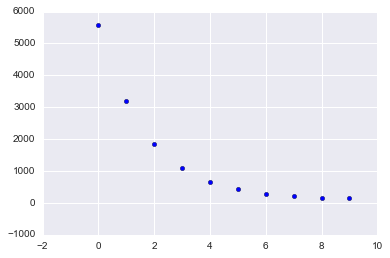

alpha: 0.00015
[5565.1078344832113, 460.06675170695729, 134.78699517658239, 114.06097930351311, 112.74032169471289, 112.6561221536397, 112.65070644913894, 112.65031064332842, 112.65023469332461, 112.65017912483493]


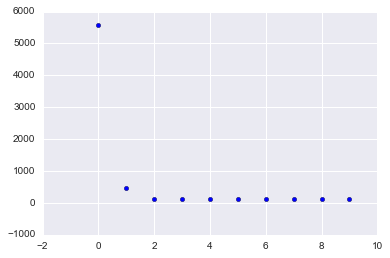

alpha: 0.00025
[5565.1078344832113, 442.50880597475373, 132.6059755497914, 113.85764640723082, 112.72334070235151, 112.65463357545245, 112.65039215035027, 112.65005072098691, 112.64994523353138, 112.64985402309482]


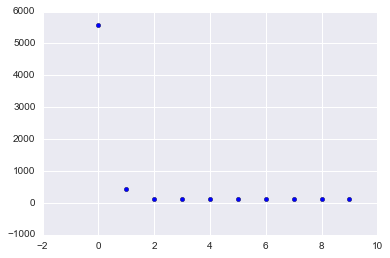

alpha: 0.00035
[5565.1078344832113, 3133.5930811374569, 1786.4084195178598, 1039.9985648646086, 626.44894478469655, 397.32106555720742, 270.37234432700126, 200.03614763441522, 161.06620994685613, 139.47479780785881]


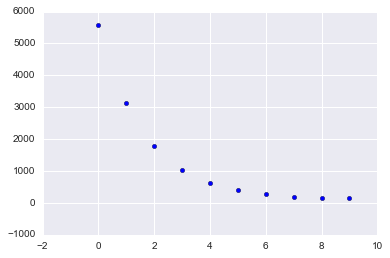

alpha: 0.00045
[5565.1078344832113, 8533.3195771950723, 13117.368298288193, 20196.884301791921, 31130.351564553068, 48015.786386028092, 74093.324437895702, 114366.96839334937, 176564.80290396669, 272621.93198195932]


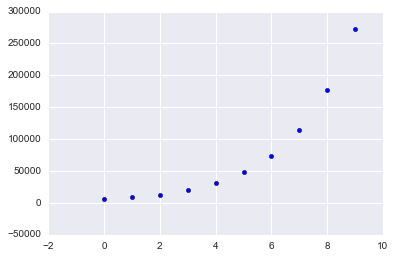

alpha: 0.00055
[5565.1078344832113, 16641.688294147596, 50220.167495253023, 152012.79749340418, 460595.54873559042, 1396059.2879322523, 4231902.8455392597, 12828717.821350541, 38889826.702960469, 117893666.8510948]


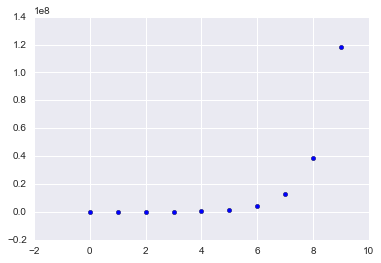

alpha: 0.00065
[5565.1078344832113, 27458.699231995026, 137262.9958059894, 687971.33982780832, 3449973.2762016826, 17302414.005056955, 86777424.724245206, 435219782.92358392, 2182784493.3198152, 10947454876.114677]


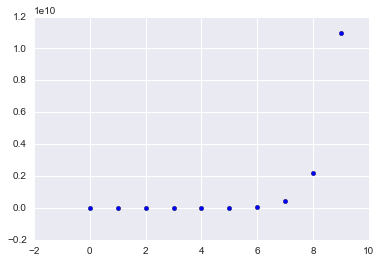

alpha: 0.00075
[5565.1078344832113, 40984.352390737367, 306487.55093825905, 2296703.5738131143, 17215393.202945456, 129046117.9431335, 967330934.28008425, 7251126688.3754225, 54354555391.425499, 407442574545.65033]


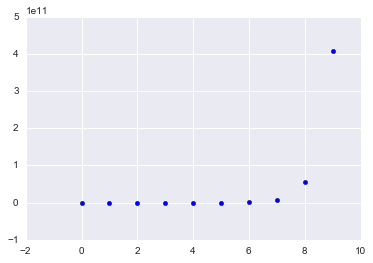

alpha: 0.00085
[5565.1078344832113, 57218.647770374577, 598209.03851200838, 6264240.869330842, 65607100.266396888, 687131134.4430486, 7196627457.7139759, 75373463835.077621, 789419649222.58923, 8267941416415.3467]


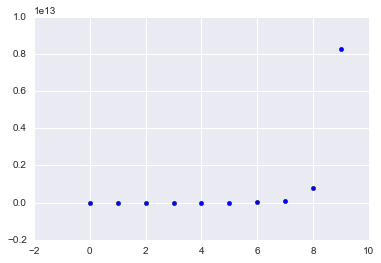

alpha: 0.00095
[5565.1078344832113, 76161.58537090676, 1060816.1720593688, 14794428.454974661, 206345972.34726238, 2878038838.7880931, 40141861554.795929, 559884419111.48145, 7809068921578.499, 108918118366844.5]


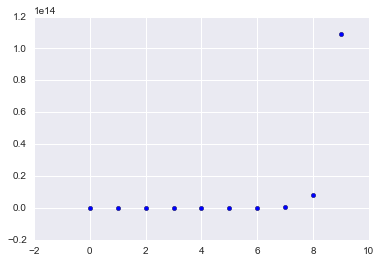

In [79]:
def run(num_iterations, alpha):
    points = genfromtxt("../data/data.csv", delimiter=",")
    errors = []
    learning_rate = alpha
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    
    return compute_error_for_line_given_points(b, m, points)
    
    return 
for alpha in range(1, 20, 2):
    errors = []
    alpha /= 20000 
    print("alpha: " + str(alpha))
    for num in range(0, 10):
        errors.append(run(num, alpha))
    print(errors)
    plt.scatter([y for y in range(0, 10)], errors)
    plt.show()
    